### 1. Installing dependencies

In [67]:
!pip install gymnasium gym-anytrading pandas matplotlib stable-baselines3[extra] finta

### 2. importing packages

In [68]:
import gymnasium as gym
import gym_anytrading
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from gym_anytrading.envs import TradingEnv, ForexEnv, StocksEnv, Actions, Positions

from stable_baselines3 import DQN
from stable_baselines3 import A2C
from stable_baselines3 import PPO



from gym_anytrading.envs import StocksEnv
from finta import TA






### Constant

In [69]:
WINDOW_SIZE = 14
DATASET_PATH = '/content/processed_TSLA.csv'


### 3. Read the dataset and preprocess it

In [70]:
df = pd.read_csv(DATASET_PATH)

In [71]:
df['Date'] = pd.to_datetime(df.Date)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Sentiment
0,0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500,1
1,1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500,0
2,2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,0
3,3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,1
4,4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,-1


In [73]:
df.set_index('Date', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
df.sort_index(inplace=True)

In [75]:
df.head()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,Sentiment
Date,,,,,,,,
2010-06-29,0,3.800,5.000,3.508,4.778,4.778,93831500,1
2010-06-30,1,5.158,6.084,4.660,4.766,4.766,85935500,0
2010-07-01,2,5.000,5.184,4.054,4.392,4.392,41094000,0
2010-07-02,3,4.600,4.620,3.742,3.840,3.840,25699000,1
2010-07-06,4,4.000,4.000,3.166,3.222,3.222,34334500,-1


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2956 entries, 2010-06-29 to 2022-03-24
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2956 non-null   int64  
 1   Open        2956 non-null   float64
 2   High        2956 non-null   float64
 3   Low         2956 non-null   float64
 4   Close       2956 non-null   float64
 5   Adj Close   2956 non-null   float64
 6   Volume      2956 non-null   int64  
 7   Sentiment   2956 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 207.8 KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
df['SMA'] = TA.SMA(df, WINDOW_SIZE)
df['RSI'] = TA.RSI(df, WINDOW_SIZE)
df['MOM'] = TA.MOM(df, WINDOW_SIZE)
df['OBV'] = TA.OBV(df,'close')
df['EMA'] = TA.EMA(df, WINDOW_SIZE)
df['Stochastic oscillator'] = TA.AO(df,WINDOW_SIZE)
df['AD'] = TA.ADL(df)
df['ROC'] = TA.ROC(df,WINDOW_SIZE)
df.fillna(0, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
df.drop(columns='Unnamed: 0', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
df.head(50)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Open,High,Low,Close,Adj Close,Volume,Sentiment,SMA,RSI,MOM,OBV,EMA,Stochastic oscillator,AD,ROC
Date,,,,,,,,,,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500,1,0.000000,0.000000,0.000,0.0,4.778000,0.000000,6.590845e+07,0.000000
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500,0,0.000000,0.000000,0.000,-85935500.0,4.771571,0.000000,-7.233279e+06,0.000000
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,0,0.000000,0.000000,0.000,-127029500.0,4.626574,0.000000,-2.374361e+07,0.000000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,1,0.000000,0.000000,0.000,-152728500.0,4.385939,0.000000,-4.370570e+07,0.000000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,-1,0.000000,0.000000,0.000,-187063000.0,4.082269,0.000000,-7.342934e+07,0.000000
2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500,0,0.000000,0.000000,0.000,-221671500.0,3.868872,0.000000,-7.363909e+07,0.000000
2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000,0,0.000000,20.112173,0.000,-183114500.0,3.789457,0.000000,-3.745482e+07,0.000000
2010-07-09,3.516,3.580,3.310,3.480,3.480,20253000,0,0.000000,19.955945,0.000,-203367500.0,3.728932,0.000000,-3.220405e+07,0.000000
2010-07-12,3.590,3.614,3.400,3.410,3.410,11012500,1,0.000000,19.027444,0.000,-214380000.0,3.670209,0.000000,-4.218734e+07,0.000000


In [80]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Close'].to_numpy()[start:end]
    diff = np.insert(np.diff(prices), 0, 0)
    signal_features = env.df.loc[:, ['Close','Sentiment','SMA', 'RSI', 'MOM', 'OBV', 'EMA', 'Stochastic oscillator', 'AD', 'ROC']].to_numpy()[start:end]
    # Reshape diff to (282, 1)
    diff_reshaped = diff.reshape(len(diff), 1)

    # Concatenate along the second axis (columns)
    signal_features = np.concatenate((signal_features, diff_reshaped), axis=1)


    return prices, signal_features

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [81]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals

In [82]:
train_df = df.loc[df.index < '2019-01-01']
test_df = df.loc[df.index >= '2019-01-01']

print('train_df: ',len(train_df))
print('test_df: ',len(test_df))

train_df:  2142
test_df:  814


In [83]:
train_df.shape

(2142, 15)

In [84]:
env = MyCustomEnv(df=train_df, frame_bound=(WINDOW_SIZE, len(train_df)), window_size=WINDOW_SIZE)

In [85]:
env.signal_features[:1,:]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[4.77800000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.77800000e+00, 0.00000000e+00,
        6.59084531e+07, 0.00000000e+00, 0.00000000e+00]])

In [86]:
env.action_space

Discrete(2)

Discrete: describes a discrete space where {0, 1, …, n-1} are the possible values our observation or action can take. Values can be shifted to {a, a+1, …, a+n-1} using an optional argument.

In [87]:
env.action_space.sample()

0

Sell = 0

Buy = 1

In [88]:
env.observation_space

Box(-10000000000.0, 10000000000.0, (14, 11), float32)

Box: describes an n-dimensional continuous space. It’s a bounded space where we can define the upper and lower limits which describe the valid values our observations can take.



In [89]:
env.observation_space.sample()

array([[ 5.2793892e+09,  3.8798065e+09,  1.0227059e+09, -5.5650545e+09,
        -6.6520008e+09,  9.8192230e+09,  3.9552506e+08,  7.2796780e+09,
         1.8405185e+09, -6.1841787e+09,  4.1072020e+09],
       [ 6.9762555e+09, -9.9380312e+07, -5.2728724e+09, -9.6475730e+09,
        -2.3328863e+09,  9.0858168e+09,  1.8110508e+09,  2.9005412e+09,
         8.8470497e+09, -9.0023795e+08, -1.2694268e+09],
       [ 3.6188895e+09, -4.0284559e+09, -1.9594241e+09, -5.7927547e+09,
        -6.0408561e+09, -9.6387213e+08,  3.2042701e+09,  2.3567846e+09,
         4.1045263e+09, -6.3917681e+09,  6.9694976e+09],
       [ 8.8075315e+08, -5.9910902e+09,  3.3172224e+09, -3.7651955e+09,
         8.0016773e+09,  5.3236055e+09, -6.1674501e+09, -7.1896077e+08,
         8.5764864e+09,  8.3059497e+09,  8.2336031e+09],
       [ 3.2576896e+09,  8.7452129e+09, -2.9380956e+09,  1.4738150e+09,
        -9.7785416e+09, -1.9988963e+09, -5.5112228e+09,  8.0878822e+09,
         6.1401626e+09, -1.8733373e+09, -3.8041457e+

### 4. Create the environment and do some random action on it

info: {'total_reward': 45.983995000000014, 'total_profit': 0.004284681837425818, 'position': <Positions.Short: 0>}


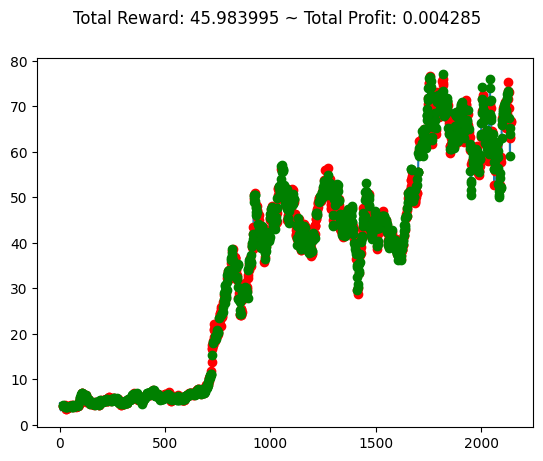

In [90]:

observation = env.reset(seed=2024)
while True:
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    # env.render()
    if done:
        print("info:", info)
        break

plt.cla()
env.unwrapped.render_all()
plt.show()

### 5 creating and training the model

In [91]:
model = A2C("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=1000000)

Streaming output truncated to the last 5000 lines.
|    value_loss         | 0.0124   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 2.13e+03 |
|    ep_rew_mean        | 57.5     |
| time/                 |          |
|    fps                | 490      |
|    iterations         | 170700   |
|    time_elapsed       | 1738     |
|    total_timesteps    | 853500   |
| train/                |          |
|    entropy_loss       | -0.0483  |
|    explained_variance | -0.266   |
|    learning_rate      | 0.0007   |
|    n_updates          | 170699   |
|    policy_loss        | 0.00128  |
|    value_loss         | 0.00869  |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 2.13e+03  |
|    ep_rew_mean        | 57.5      |
| time/                 |           |
|    fps                | 491       |
|    iterations   

### Save model

In [92]:
# model.save('ppo_1000000_15_senti')

In [93]:
# del model

### Load model

In [94]:
# model = A2C.load('/content/ppo_1000000_15_senti.zip')

### 6. Evaluate the model

info: {'total_reward': 154.06397799999996, 'total_profit': 5.521000203005773, 'position': <Positions.Long: 1>}


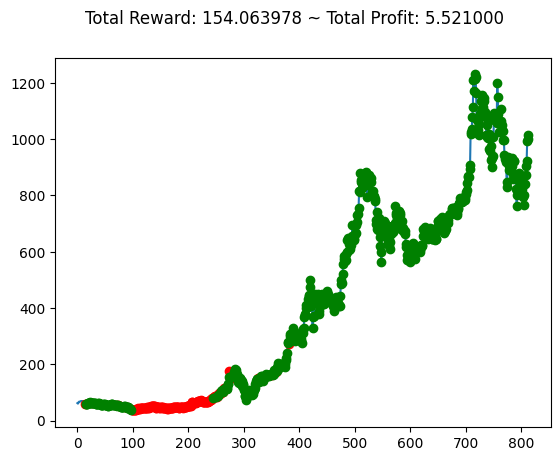

In [95]:
env = MyCustomEnv(df=test_df, frame_bound=(WINDOW_SIZE, len(test_df)), window_size=WINDOW_SIZE)



observation, info = env.reset(seed=2024)
while True:
    # print('ob',observation)
    action = model.predict(observation)
    # print('action',action[0])
    observation, reward, terminated, truncated, info = env.step(action[0])
    done = terminated or truncated

    # env.render()
    if done:
        print("info:", info)
        break

plt.cla()
env.unwrapped.render_all()
plt.show()


In [96]:
AWR = env.history['total_profit']

average_sharpe_ratio = np.mean(AWR) / np.std(AWR)
print('Sharpe Ratio:', average_sharpe_ratio)

Sharpe Ratio: 3.246756635668858


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
